In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rosbag
from scipy.signal import savgol_filter
%matplotlib inline

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


# Stepper Timing

In [2]:
limit = [450, 200, 150, 125, 100] # microseconds
increment = [-1., -3., -0.5, -0.05, -0.005] # microseconds
delay = 600 # Initial delay

timing = [delay]
delta_timing = [increment[0]]
total = 0

while delay > limit[-1]:
    total += int(delay)
    for i in range(len(limit)):
        if delay > limit[i]:
            delay += increment[i]
            break
    timing.append(delay)
    delta_timing.append(increment[i])

rpm = 1./(360/0.9*2*limit[-1]/1e6)*60
print("total: {} s".format(total/1e6))
print("rpm: {} rpm".format(rpm))

total: 0.751491 s
rpm: 750.0 rpm


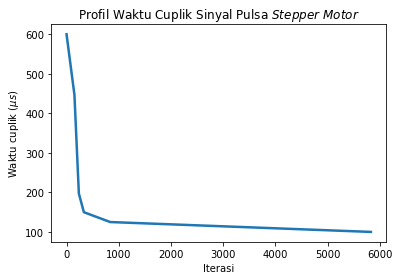

In [3]:
plt.plot(timing, linewidth=2.5)
plt.xlabel("Iterasi")
plt.ylabel(r"Waktu cuplik ($\mu s$)")
plt.title(r"Profil Waktu Cuplik Sinyal Pulsa $Stepper$ $Motor$")
plt.savefig("img/profil_sinyal_stepper.png", dpi=500, transparent=True)
plt.show()

# Import Rosbag Data

In [4]:
ls

Archieved/  data/  img/  steering_angle_calibration.ipynb


In [5]:
bag = rosbag.Bag('data/log_steer_lantai_licin_tanpa_orang.bag')
bag.get_type_and_topic_info()

TypesAndTopicsTuple(msg_types={'pkg_ta/Control': 'f3ff5e621674977340f826fa8303fddf', 'pkg_ta/LogArduino': '794f6f831f1064c1b29b65087ebb232f', 'rosgraph_msgs/Log': 'acffd30cd6b6de30f120938c17c593fb'}, topics={'/control_signal': TopicTuple(msg_type='pkg_ta/Control', message_count=1095, connections=1, frequency=20.00455006140675), '/logging_arduino': TopicTuple(msg_type='pkg_ta/LogArduino', message_count=2877, connections=1, frequency=49.52771414401436), '/rosout': TopicTuple(msg_type='rosgraph_msgs/Log', message_count=6, connections=3, frequency=4.368456902890638), '/rosout_agg': TopicTuple(msg_type='rosgraph_msgs/Log', message_count=3, connections=1, frequency=0.036945387224425356)})

# Tanpa Orang Lantai Licin

In [6]:
bag = rosbag.Bag('data/log_steer_lantai_licin_tanpa_orang.bag')
bag.get_type_and_topic_info()

TypesAndTopicsTuple(msg_types={'pkg_ta/Control': 'f3ff5e621674977340f826fa8303fddf', 'pkg_ta/LogArduino': '794f6f831f1064c1b29b65087ebb232f', 'rosgraph_msgs/Log': 'acffd30cd6b6de30f120938c17c593fb'}, topics={'/control_signal': TopicTuple(msg_type='pkg_ta/Control', message_count=1095, connections=1, frequency=20.00455006140675), '/logging_arduino': TopicTuple(msg_type='pkg_ta/LogArduino', message_count=2877, connections=1, frequency=49.52771414401436), '/rosout': TopicTuple(msg_type='rosgraph_msgs/Log', message_count=6, connections=3, frequency=4.368456902890638), '/rosout_agg': TopicTuple(msg_type='rosgraph_msgs/Log', message_count=3, connections=1, frequency=0.036945387224425356)})

In [7]:
list_topic = []
list_msg = []
list_t = []
list_seq = []
list_t_header = []
list_steering_setpoint = []
list_steering_delta = []
list_steering_angle = []
list_steering_absolute_encoder = []

for topic, msg, t in bag.read_messages(topics=['/logging_arduino']):
    list_topic.append(topic)
    list_msg.append(msg)
    list_t.append(t.secs + t.nsecs/1e9)
    list_seq.append(msg.header.seq)
    list_t_header.append(msg.header.stamp.secs + msg.header.stamp.nsecs / 1e9)
    list_steering_setpoint.append(msg.steering_setpoint)
    list_steering_delta.append(msg.steering_delta)
    list_steering_angle.append(msg.steering_angle)
    list_steering_absolute_encoder.append(msg.steering_absolute_encoder)
    
list_t = np.array(list_t)
list_t -= list_t[0]
list_t_header_1 = np.array(list_t_header)
list_t_header_1 -= list_t_header_1[0]

dt = list_t[1:] - list_t[:-1]
dt_header_1 = list_t_header_1[1:] - list_t_header_1[:-1]

#t_filtered = savgol_filter(np.array(list_t), 101, 3)
#t_header_filtered_1 = savgol_filter(np.array(list_t_header), 101, 3)

steering_setpoint_1 = np.array(list_steering_setpoint)
steering_delta_1 = savgol_filter(np.array(list_steering_delta), 101, 3)
steering_angle_1 = savgol_filter(np.array(list_steering_angle), 101, 3)
#w_filtered = savgol_filter(np.gradient(steering_angle, t_filtered), 101, 3)
w_filtered_header_1 = savgol_filter(np.gradient(steering_angle_1, list_t_header_1), 101, 3)

Sampling Rate yang digunakan di rospy adalah 50 Hz

dt_header
mean: 0.02006808690136099
std: 0.0003210118484772074



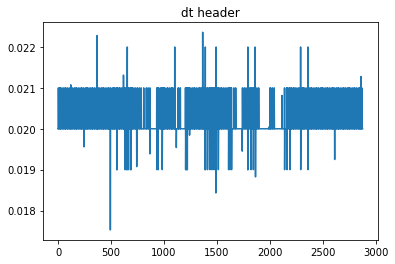

In [8]:
print('Sampling Rate yang digunakan di rospy adalah 50 Hz\n')
print('dt_header')
print('mean: {}'.format(np.mean(dt_header_1)))
print('std: {}'.format(np.std(dt_header_1)))
print('')

plt.plot(dt_header_1)
plt.title("dt header")
plt.show()

In [9]:
idx1 = np.where(np.abs(steering_setpoint_1[1:] - steering_setpoint_1[:-1]) >= 1)[0]
idx_1 = [idx1[0], -1]#idx_1[-1] + 500]

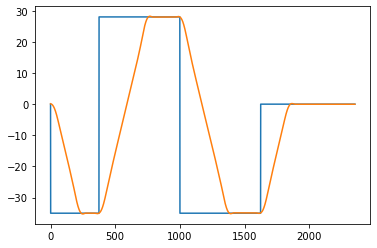

In [10]:
plt.plot(steering_setpoint_1[idx_1[0]:idx_1[1]])
plt.plot(steering_angle_1[idx_1[0]:idx_1[1]])

# Dua Orang Lantai Licin

## Import Data

In [11]:
bag = rosbag.Bag('data/log_steer_lantai_licin_2_orang.bag')
bag.get_type_and_topic_info()

TypesAndTopicsTuple(msg_types={'pkg_ta/Control': 'f3ff5e621674977340f826fa8303fddf', 'pkg_ta/LogArduino': '794f6f831f1064c1b29b65087ebb232f', 'rosgraph_msgs/Log': 'acffd30cd6b6de30f120938c17c593fb'}, topics={'/control_signal': TopicTuple(msg_type='pkg_ta/Control', message_count=1023, connections=1, frequency=20.002498938904758), '/logging_arduino': TopicTuple(msg_type='pkg_ta/LogArduino', message_count=2394, connections=1, frequency=49.53356322925032), '/rosout': TopicTuple(msg_type='rosgraph_msgs/Log', message_count=6, connections=3, frequency=5.478983078301717), '/rosout_agg': TopicTuple(msg_type='rosgraph_msgs/Log', message_count=2, connections=1, frequency=5.500481290014609)})

In [12]:
list_topic = []
list_msg = []
list_t = []
list_seq = []
list_t_header = []
list_steering_setpoint = []
list_steering_delta = []
list_steering_angle = []
list_steering_absolute_encoder = []

for topic, msg, t in bag.read_messages(topics=['/logging_arduino']):
    list_topic.append(topic)
    list_msg.append(msg)
    list_t.append(t.secs + t.nsecs/1e9)
    list_seq.append(msg.header.seq)
    list_t_header.append(msg.header.stamp.secs + msg.header.stamp.nsecs / 1e9)
    list_steering_setpoint.append(msg.steering_setpoint)
    list_steering_delta.append(msg.steering_delta)
    list_steering_angle.append(msg.steering_angle)
    list_steering_absolute_encoder.append(msg.steering_absolute_encoder)
    
list_t = np.array(list_t)
list_t -= list_t[0]
list_t_header_2 = np.array(list_t_header)
list_t_header_2 -= list_t_header_2[0]

dt = list_t[1:] - list_t[:-1]
dt_header_2 = list_t_header_2[1:] - list_t_header_2[:-1]

#t_filtered = savgol_filter(np.array(list_t), 101, 3)
#t_header_filtered_2 = savgol_filter(np.array(list_t_header), 101, 3)

steering_setpoint_2 = np.array(list_steering_setpoint)
steering_delta_2 = savgol_filter(np.array(list_steering_delta), 101, 3)
steering_angle_2 = savgol_filter(np.array(list_steering_angle), 101, 3)
#w_filtered = savgol_filter(np.gradient(steering_angle, t_filtered), 101, 3)
w_filtered_header_2 = savgol_filter(np.gradient(steering_angle_2, list_t_header_2), 101, 3)

Sampling Rate yang digunakan di rospy adalah 50 Hz

dt_header
mean: 0.020070109465009638
std: 0.0003980706627632142



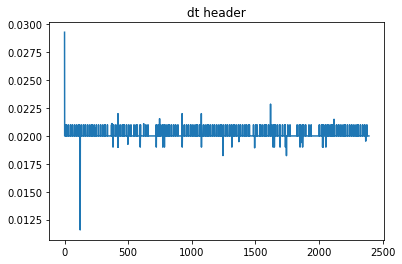

In [13]:
print('Sampling Rate yang digunakan di rospy adalah 50 Hz\n')
print('dt_header')
print('mean: {}'.format(np.mean(dt_header_2)))
print('std: {}'.format(np.std(dt_header_2)))
print('')

plt.plot(dt_header_2)
plt.title("dt header")
plt.show()

In [14]:
idx2 = np.where(np.abs(steering_setpoint_2[1:] - steering_setpoint_2[:-1]) >= 1)[0]
idx_2 = [idx2[0], -1]#idx_2[-1] + 500]

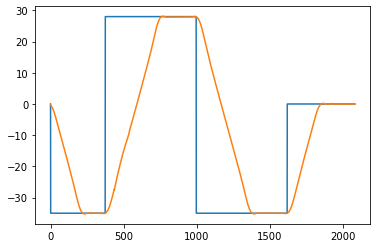

In [15]:
plt.plot(steering_setpoint_2[idx_2[0]:idx_2[1]])
plt.plot(steering_angle_2[idx_2[0]:idx_2[1]])

# Analisis dan PLOT

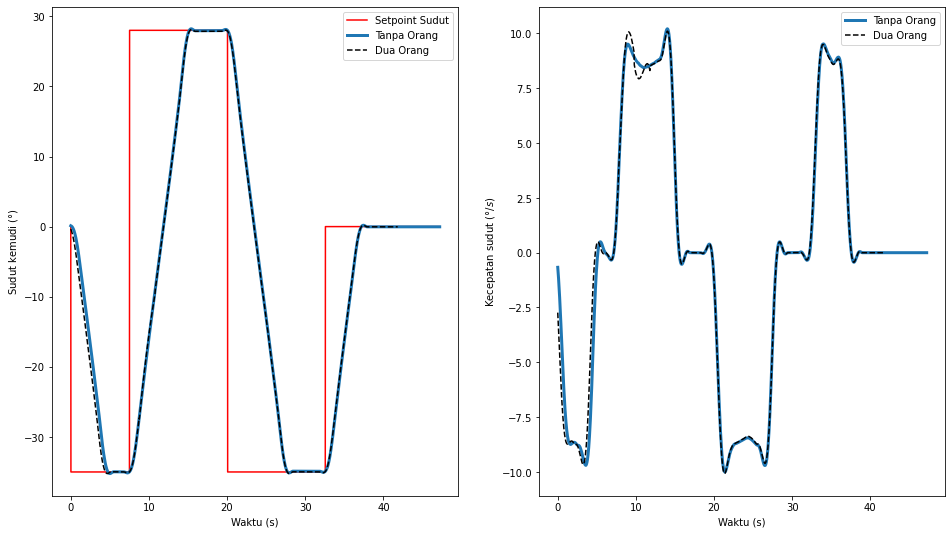

In [16]:
scale = 1.
plt.figure(figsize=(16*scale, 9*scale))

# Plot the steering angle
plt.subplot(1,2,1)
plt.plot(list_t_header_1[idx_1[0]:idx_1[1]] - list_t_header_1[idx_1[0]], steering_setpoint_1[idx_1[0]:idx_1[1]], label=r'Setpoint Sudut', color='red')
plt.plot(list_t_header_1[idx_1[0]:idx_1[1]] - list_t_header_1[idx_1[0]], steering_angle_1[idx_1[0]:idx_1[1]], label='Tanpa Orang', linewidth=3.0)
plt.plot(list_t_header_2[idx_2[0]:idx_2[1]] - list_t_header_2[idx_2[0]], steering_angle_2[idx_2[0]:idx_2[1]], label='Dua Orang', linestyle='--', color='black', linewidth=1.5)
plt.xlabel('Waktu (s)')
plt.ylabel(r'Sudut kemudi $(\degree)$')
#plt.title('Profil Sudut Kemudi', fontweight='bold')
plt.legend()

# Plot the steering angle
plt.subplot(1,2,2)
plt.plot(list_t_header_1[idx_1[0]:idx_1[1]] - list_t_header_1[idx_1[0]], w_filtered_header_1[idx_1[0]:idx_1[1]], label='Tanpa Orang', linewidth=3.0)
plt.plot(list_t_header_2[idx_2[0]:idx_2[1]] - list_t_header_2[idx_2[0]], w_filtered_header_2[idx_2[0]:idx_2[1]], label='Dua Orang', linestyle='--', color='black', linewidth=1.5)
plt.xlabel('Waktu (s)')
plt.ylabel(r'Kecepatan sudut $(\degree/s)$')
#plt.title('Profil Kecepatan Sudut Kemudi', fontweight='bold')
plt.legend()

# plt.savefig('kalibrasi_absolute_encoder.png', dpi=600, transparent=True)
plt.show()

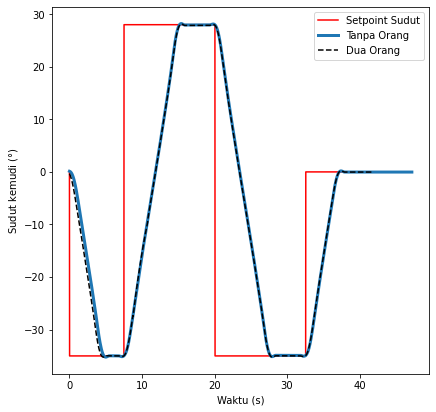

In [17]:
scale = 0.75
plt.figure(figsize=(9*scale, 9*scale))

# Plot the steering angle
plt.subplot(1,1,1)
plt.plot(list_t_header_1[idx_1[0]:idx_1[1]] - list_t_header_1[idx_1[0]], steering_setpoint_1[idx_1[0]:idx_1[1]], label=r'Setpoint Sudut', color='red')
plt.plot(list_t_header_1[idx_1[0]:idx_1[1]] - list_t_header_1[idx_1[0]], steering_angle_1[idx_1[0]:idx_1[1]], label='Tanpa Orang', linewidth=3.0)
plt.plot(list_t_header_2[idx_2[0]:idx_2[1]] - list_t_header_2[idx_2[0]], steering_angle_2[idx_2[0]:idx_2[1]], label='Dua Orang', linestyle='--', color='black', linewidth=1.5)
plt.xlabel('Waktu (s)')
plt.ylabel(r'Sudut kemudi $(\degree)$')
#plt.title('Profil Sudut Kemudi', fontweight='bold')
plt.legend()
plt.savefig('img/profil_sudut_kemudi.png', dpi=600, transparent=True)
plt.show()

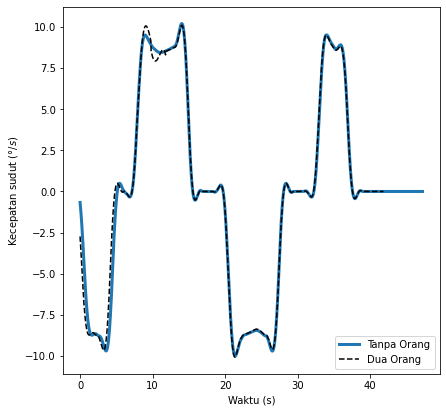

In [18]:
scale = 0.75
plt.figure(figsize=(9*scale, 9*scale))

# Plot the steering angle
plt.subplot(1,1,1)
plt.plot(list_t_header_1[idx_1[0]:idx_1[1]] - list_t_header_1[idx_1[0]], w_filtered_header_1[idx_1[0]:idx_1[1]], label='Tanpa Orang', linewidth=3.0)
plt.plot(list_t_header_2[idx_2[0]:idx_2[1]] - list_t_header_2[idx_2[0]], w_filtered_header_2[idx_2[0]:idx_2[1]], label='Dua Orang', linestyle='--', color='black', linewidth=1.5)
plt.xlabel('Waktu (s)')
plt.ylabel(r'Kecepatan sudut $(\degree/s)$')
#plt.title('Profil Kecepatan Sudut Kemudi', fontweight='bold')
plt.legend()
plt.savefig('img/profil_kecepatan_sudut_kemudi.png', dpi=600, transparent=True)
plt.show()

# Waktu yang Dibutuhkan

# Tanpa Beban

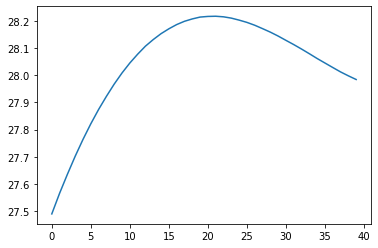

In [19]:
plt.plot(steering_angle_1[1270:1310])

In [20]:
idx1

array([ 523,  897, 1522, 2146])

In [21]:
np.where(np.abs(steering_delta_1) <= 0.02)

(array([ 760,  790,  791,  792,  793,  794, 1279, 1307, 1308, 1309, 1496,
        1905, 1927, 1928, 1929, 2376, 2377, 2406, 2407, 2408, 2409]),)

In [22]:
print("STAGE 1: {} s".format(list_t_header_1[760] - list_t_header_1[idx1[0]]))
print("STAGE 2: {} s".format(list_t_header_1[1279] - list_t_header_1[idx1[1]]))
print("STAGE 3: {} s".format(list_t_header_1[1905] - list_t_header_1[idx1[2]]))
print("STAGE 4: {} s".format(list_t_header_1[2376] - list_t_header_1[idx1[3]]))

STAGE 1: 4.759387016296387 s
STAGE 2: 7.667233943939209 s
STAGE 3: 7.680956125259399 s
STAGE 4: 4.619242906570435 s


# Dengan 2 Orang

In [23]:
idx2

array([ 308,  682, 1305, 1928])

In [24]:
np.where(np.abs(steering_delta_2) <= 0.02)

(array([ 529,  559,  560,  561,  562,  563, 1068, 1088, 1089, 1688, 1718,
        1719, 1720, 1721, 1722, 2160, 2161, 2190, 2191, 2192, 2193]),)

In [25]:
print("STAGE 1: {} s".format(list_t_header_2[529] - list_t_header_2[idx2[0]]))
print("STAGE 2: {} s".format(list_t_header_2[1068] - list_t_header_2[idx2[1]]))
print("STAGE 3: {} s".format(list_t_header_2[1688] - list_t_header_2[idx2[2]]))
print("STAGE 4: {} s".format(list_t_header_2[2160] - list_t_header_2[idx2[3]]))

STAGE 1: 4.437361001968384 s
STAGE 2: 7.748549938201904 s
STAGE 3: 7.690274000167847 s
STAGE 4: 4.655493974685669 s
